#Task2: Stock Market Prediction and Forecasting using stacked LSTM 📈📉

## Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler


## Reading the dataset 📖

In [ ]:
df = pd.read_csv("NSE-TATAGLOBAL.csv")

In [ ]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


#### Displaying the basic statistics about data

In [ ]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


## Sorting the data

#### Checking for null values

In [ ]:
nan_values = [(c, df[c].isnull().mean()*100) for c in df]
nan_values = pd.DataFrame(nan_values, columns=['column_name', 'percentage'])
nan_values

,column_name,percentage
0,Date,0.0
1,Open,0.0
2,High,0.0
3,Low,0.0
4,Last,0.0
5,Close,0.0
6,Total Trade Quantity,0.0
7,Turnover (Lacs),0.0


In [ ]:
df_sorted=df.sort_values(by='Date')
df_sorted.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [ ]:
df_sorted.reset_index(inplace=True) 

## Data Visualization 😎📉📈📊

#### Plotting the graph for the Date and Close 

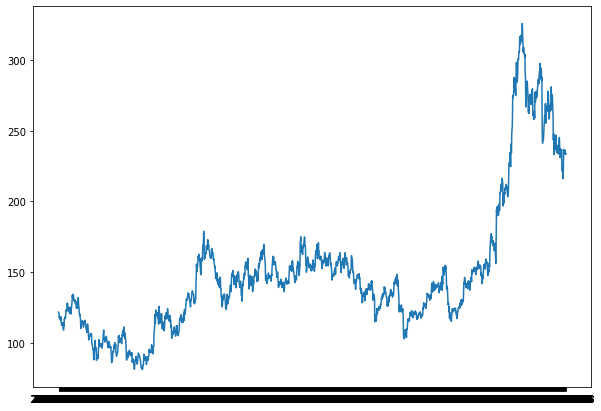

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(df_sorted['Date'],df_sorted['Close']) 

In [ ]:
close = df_sorted['Close']
close

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

Helper function

In [ ]:
def plot_series(time, series, format="-", start=0, end=None):
    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))
    
    if type(series) is tuple:

      for series_num in series:
        # Plot the time series data
        plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()


## Feature Scaling(MinMax Scaler) ⚖️

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1)) 
close = scaler.fit_transform(np.array(close).reshape(-1, 1))
close

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

Since LSTM are sensitive to the scale of the data, so we apply MinMax Scaler to transform our values between 0 and 1

## Splitting the dataset

In [ ]:
train_size = int(len(close)*0.7)
test_size = len(close) - train_size
train_data,test_data = close[0:train_size,:],close[train_size:len(close),:1]

In [ ]:
train_data.shape

(1424, 1)

In [ ]:
test_data.shape

(611, 1)

## convert an array of values into a dataset matrix 🤓🤓🤓

In [ ]:
def dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]  
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

## Reshaping of dataset

In [ ]:
time_step = 100
X_train, y_train = dataset(train_data, time_step)
X_test, y_test = dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [ ]:
print(X_test.shape), print(y_test.shape)

(510, 100)
(510,)


(None, None)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

## Let's Create the stacked LSTM Model 🎉🎉🎉

In [ ]:
import tensorflow as tf

In [ ]:
#Creating the LSTM model
model=tf.keras.models.Sequential([
tf.keras.layers.LSTM(40,return_sequences=True,input_shape=(100,1)),
tf.keras.layers.LSTM(40,return_sequences=True),
tf.keras.layers.LSTM(40,return_sequences=True),
tf.keras.layers.LSTM(40),
tf.keras.layers.Dense(1)
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100, 40)           6720      
                                                                 
 lstm_9 (LSTM)               (None, 100, 40)           12960     
                                                                 
 lstm_10 (LSTM)              (None, 100, 40)           12960     
                                                                 
 lstm_11 (LSTM)              (None, 40)                12960     
                                                                 
 dense_2 (Dense)             (None, 1)                 41        
                                                                 
Total params: 45,641
Trainable params: 45,641
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.SGD(momentum=0.9))

## Let's Predict 🪄🧙🧙

In [ ]:
model.fit(X_train,y_train,validation_split=0.1,epochs=50,batch_size=64)

Epoch 1/50
19/19 [==============================] - 32s 899ms/step - loss: 0.0191 - val_loss: 0.0026
Epoch 2/50
19/19 [==============================] - 5s 270ms/step - loss: 0.0105 - val_loss: 0.0024
Epoch 3/50
19/19 [==============================] - 4s 209ms/step - loss: 0.0087 - val_loss: 0.0022
Epoch 4/50
19/19 [==============================] - 4s 208ms/step - loss: 0.0076 - val_loss: 0.0022
Epoch 5/50
19/19 [==============================] - 4s 206ms/step - loss: 0.0065 - val_loss: 0.0020
Epoch 6/50
19/19 [==============================] - 4s 215ms/step - loss: 0.0052 - val_loss: 0.0026
Epoch 7/50
19/19 [==============================] - 4s 209ms/step - loss: 0.0038 - val_loss: 0.0019
Epoch 8/50
19/19 [==============================] - 4s 212ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 9/50
19/19 [==============================] - 4s 209ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 10/50
19/19 [==============================] - 4s 209ms/step - loss: 0.0013 - val_loss: 0.002

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

16/16 [==============================] - 1s 40ms/step


In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

## Checking the Performance 🛫🛫

In [ ]:
import math

In [ ]:
mse = tf.keras.metrics.mean_squared_error(y_test,test_predict.squeeze())
print(math.sqrt(mse.numpy()))

189.03015219138982


In [ ]:
mae = tf.keras.metrics.mean_absolute_error(y_test,test_predict.squeeze())
print(f'The mean absolute error is: {(mae.numpy())}')

The mean absolute error is: 183.95672607421875


#### Plotting the graph with predicted train data, test data with actual data

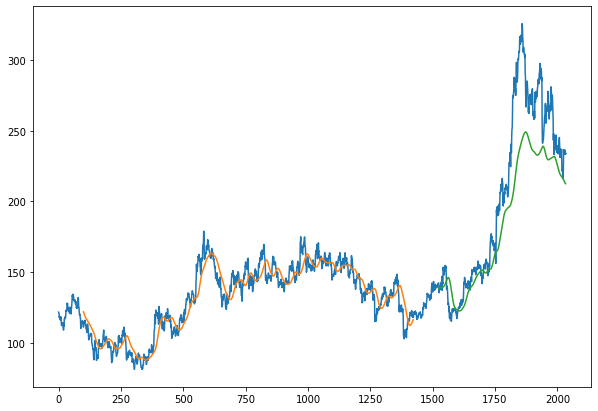

In [ ]:
look_back=100

# shift train predictions for plotting
trainPredictPlot = np.empty_like(close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(close)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(10,7))
plt.plot(scaler.inverse_transform(close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### Prediction for next 30 days

In [ ]:
len(test_data)

611

In [ ]:
pred_input=test_data[511:].reshape(1,-1)
pred_input.shape

(1, 100)

In [ ]:
temp_input=list(pred_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.8527369281045751,
 0.8621323529411764,
 0.8345588235294117,
 0.84375,
 0.7146650326797386,
 0.6605392156862745,
 0.6542075163398693,
 0.6803513071895424,
 0.6689133986928104,
 0.6642156862745099,
 0.678921568627451,
 0.6913807189542482,
 0.7089460784313726,
 0.7226307189542485,
 0.7340686274509802,
 0.7212009803921569,
 0.749795751633987,
 0.7689950980392157,
 0.7446895424836601,
 0.7120098039215685,
 0.7467320261437909,
 0.7549019607843137,
 0.7604166666666667,
 0.7598039215686274,
 0.7465277777777777,
 0.7624591503267975,
 0.7706290849673203,
 0.8041258169934642,
 0.7810457516339868,
 0.7941176470588236,
 0.7602124183006536,
 0.7348856209150327,
 0.7240604575163399,
 0.7399918300653596,
 0.749795751633987,
 0.7614379084967322,
 0.7542892156862746,
 0.7475490196078431,
 0.769607843137255,
 0.7495915032679739,
 0.8171977124183007,
 0.8020833333333335,
 0.7773692810457518,
 0.7571486928104576,
 0.7937091503267975,
 0.7916666666666667,
 0.7714460784313726,
 0.7526552287581698,
 0.7269

In [ ]:
lst_output=[] #predicted 30 days output
n_steps=100
i=0
while(i<30): #for 30 days-change according to the number of days you want
    
    if(len(temp_input)>100):
        #print(temp_input)
        pred_input=np.array(temp_input[1:]) # for last 100 data
        print("{} day input {}".format(i,pred_input))
        pred_input=pred_input.reshape(1,-1)
        pred_input = pred_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(pred_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        pred_input = pred_input.reshape((1, n_steps,1))
        yhat = model.predict(pred_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.53611135]
101
1 day input [0.86213235 0.83455882 0.84375    0.71466503 0.66053922 0.65420752
 0.68035131 0.6689134  0.66421569 0.67892157 0.69138072 0.70894608
 0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.74468954
 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392 0.74652778
 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464

#### Ploting last 130 days Closing Price

In [ ]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [ ]:
len(close)

2035

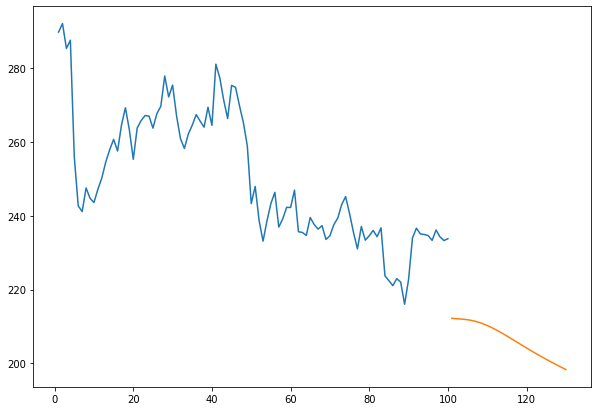

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(day_new,scaler.inverse_transform(close[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

#### Appending in a list is done to make continuous graph

In [ ]:
df3=close.tolist()
#adding specified list of predicted 30 days output to the end of last 100 days output
df3.extend(lst_output)

In [ ]:
print(len(df3))

2065


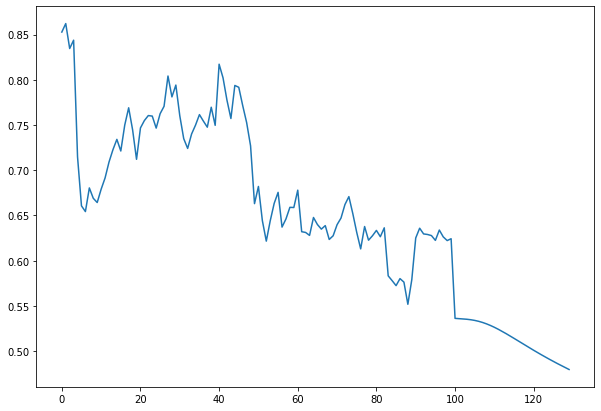

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(df3[1935:]) #latest 100 days output

#### Plotting the graph with predicted 30 days output

In [ ]:
df3=scaler.inverse_transform(df3).tolist() #undoing scaling of df3

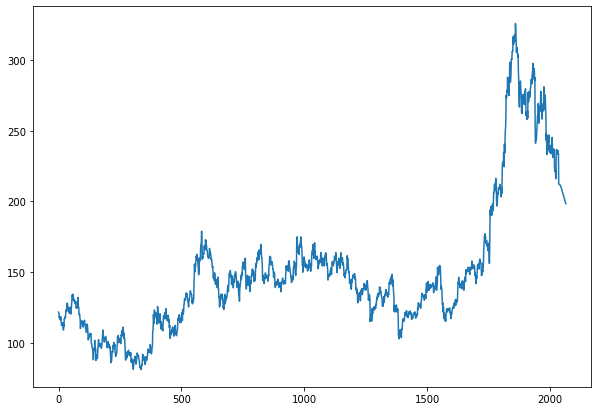

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(df3)